# Lab | Clustering songs

## Introduction

Now it's time to cluster the songs of the **hot_songs** and **not_hot_songs** databases according to the song's audio features. For this purpose, you need to consider the following questions:

* Are you going to use all the audio features? I
  * If not, which ones do you think that makes more sense to be used?
  * It might make sense to use a dimensionality reduction technique to visualize the songs with only two features?
* What is the optimal number of clusters (for methods that need to know this beforehand)?
* What is the best distance to use?
* What clustering method provides better results?
* Does the clustering method need a transformer?

## Considerations

Be aware that this process is extremely time-consuming!!! (it might take several hours on your laptop). Therefore, when testing different options, save the models into your disk in order to be able to use the best model later.  You don't want to retrain the best model again when you know what are the optimal parameters for each.

To determine which clustering method performs best, you need to be practical and think about how many clusters you might want to have alongside with a [clustering metric](https://analyticsindiamag.com/a-tutorial-on-various-clustering-evaluation-metrics/) to evaluate how good or bad the songs were clustered.
If the number of clusters is small, each cluster will be too big and generic. On the contrary, if the number of clusters is too big then each cluster will be too specific and it will be poorly populated (this also depends on how heterogeneous is your dataset).

On the other hand, when you train your clustering model make sure to concatenate both databases together (ie: **hot_songs** and **not_hot_songs**) before. 
If you don't combine both datasets, the clusters obtained with the **hot_songs** will be different than the ones obtained with the **not_hot_songs**
database even though they might have the same label because they will contain different songs. However, after this, you will not know to which original
dataframe belongs each song. To prevent this problem, before the concatenation you can add a new column named "dataset" with a "flag" to remind yourself in which dataset was included ("Hot", "Not hot")
each song. 

Finally, add a new column to the full dataset **for each clustering method with the cluster membership of each song** 

## Loading Hot and NotHot Datasets

In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
hot100 = pd.read_csv('hot100_full.csv')
nothot100 = pd.read_csv('nothot100_full.csv')

In [3]:
total_df = pd.concat([hot100, nothot100])

In [4]:
total_df

,artist,song,id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,type,id.1,uri,track_href,analysis_url,duration_ms,time_signature,H_or_N
0,Jack Harlow,Lovin On Me,spotify:track:4xhsWYTOGcal8zt0J161CU,0.943,0.558,2,-4.911,1,0.0568,0.00260,...,0.606,104.983,audio_features,4xhsWYTOGcal8zt0J161CU,spotify:track:4xhsWYTOGcal8zt0J161CU,https://api.spotify.com/v1/tracks/4xhsWYTOGcal...,https://api.spotify.com/v1/audio-analysis/4xhs...,138411,4,H
1,Taylor Swift,Cruel Summer,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,0.552,0.702,9,-5.707,1,0.1570,0.11700,...,0.564,169.994,audio_features,1BxfuPKGuaTgP7aM0Bbdwr,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,https://api.spotify.com/v1/tracks/1BxfuPKGuaTg...,https://api.spotify.com/v1/audio-analysis/1Bxf...,178427,4,H
2,Tate McRae,Greedy,spotify:track:3rUGC1vUpkDG9CZFHMur1t,0.750,0.733,6,-3.180,0,0.0319,0.25600,...,0.844,111.018,audio_features,3rUGC1vUpkDG9CZFHMur1t,spotify:track:3rUGC1vUpkDG9CZFHMur1t,https://api.spotify.com/v1/tracks/3rUGC1vUpkDG...,https://api.spotify.com/v1/audio-analysis/3rUG...,131872,1,H
3,Doja Cat,Paint The Town Red,spotify:track:2IGMVunIBsBLtEQyoI1Mu7,0.868,0.538,5,-8.603,1,0.1740,0.26900,...,0.732,99.968,audio_features,2IGMVunIBsBLtEQyoI1Mu7,spotify:track:2IGMVunIBsBLtEQyoI1Mu7,https://api.spotify.com/v1/tracks/2IGMVunIBsBL...,https://api.spotify.com/v1/audio-analysis/2IGM...,231750,4,H
4,Zach Bryan Featuring Kacey Musgraves,I Remember Everything,spotify:track:4KULAymBBJcPRpk1yO4dOG,0.429,0.453,0,-7.746,1,0.0459,0.55400,...,0.155,77.639,audio_features,4KULAymBBJcPRpk1yO4dOG,spotify:track:4KULAymBBJcPRpk1yO4dOG,https://api.spotify.com/v1/tracks/4KULAymBBJcP...,https://api.spotify.com/v1/audio-analysis/4KUL...,227196,4,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,spotify:track:22vgEDb5hykfaTwLuskFGD,0.775,0.598,2,-7.274,1,0.0535,0.00175,...,0.356,129.988,audio_features,0lnIJmgcUpEpe4AZACjayW,spotify:track:0lnIJmgcUpEpe4AZACjayW,https://api.spotify.com/v1/tracks/0lnIJmgcUpEp...,https://api.spotify.com/v1/audio-analysis/0lnI...,232560,4,N
1996,Taylor Swift,Cruel Summer,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,0.773,0.747,5,-4.061,1,0.0885,0.02420,...,0.801,126.014,audio_features,0ErK6K0kYr0Ow2RkPMhmMs,spotify:track:0ErK6K0kYr0Ow2RkPMhmMs,https://api.spotify.com/v1/tracks/0ErK6K0kYr0O...,https://api.spotify.com/v1/audio-analysis/0ErK...,246240,4,N
1997,Blanco Brown,The Git Up,spotify:track:01tA4XmJ4fGQNwti6b2hPm,0.664,0.573,5,-6.519,1,0.0277,0.61300,...,0.566,76.023,audio_features,3d8y0t70g7hw2FOWl9Z4Fm,spotify:track:3d8y0t70g7hw2FOWl9Z4Fm,https://api.spotify.com/v1/tracks/3d8y0t70g7hw...,https://api.spotify.com/v1/audio-analysis/3d8y...,160097,4,N
1998,Sam Smith,Dancing With A Stranger (with Normani),spotify:track:3xgT3xIlFGqZjYW9QlhJWp,0.275,0.238,9,-13.119,1,0.0389,0.97700,...,0.257,88.980,audio_features,0fF9YHMCuv1mAQv4z5SU7L,spotify:track:0fF9YHMCuv1mAQv4z5SU7L,https://api.spotify.com/v1/tracks/0fF9YHMCuv1m...,https://api.spotify.com/v1/audio-analysis/0fF9...,155167,4,N


In [5]:
total_df.to_csv('full_data.csv', index=False)

# Selecting Features

In [6]:
X = total_df.select_dtypes(include = np.number)

In [7]:
X = X.drop({'mode', 'duration_ms','time_signature'}, axis=1) 

In [8]:
X = X.reset_index(drop=True)
X

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.943,0.558,2,-4.911,0.0568,0.00260,0.000002,0.0937,0.606,104.983
1,0.552,0.702,9,-5.707,0.1570,0.11700,0.000021,0.1050,0.564,169.994
2,0.750,0.733,6,-3.180,0.0319,0.25600,0.000000,0.1140,0.844,111.018
3,0.868,0.538,5,-8.603,0.1740,0.26900,0.000003,0.0901,0.732,99.968
4,0.429,0.453,0,-7.746,0.0459,0.55400,0.000002,0.1020,0.155,77.639
...,...,...,...,...,...,...,...,...,...,...
2095,0.775,0.598,2,-7.274,0.0535,0.00175,0.000004,0.2530,0.356,129.988
2096,0.773,0.747,5,-4.061,0.0885,0.02420,0.000009,0.1090,0.801,126.014
2097,0.664,0.573,5,-6.519,0.0277,0.61300,0.000363,0.0857,0.566,76.023
2098,0.275,0.238,9,-13.119,0.0389,0.97700,0.912000,0.1450,0.257,88.980


# Dimensionality Reduction

In [9]:
# Dimensionality Reduction

import numpy as np
import pandas as pd
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler

In [10]:
total_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,0.665100,0.707474,5.410000,-5.783525,0.567619,0.102778,0.146547,0.027393,0.181648,0.541475,120.097899,226517.265714,3.982381
std,0.142213,0.166388,3.615381,2.652679,0.495525,0.096477,0.200268,0.131568,0.142002,0.225162,27.210620,42774.728020,0.254870
min,0.000000,0.000050,0.000000,-39.264000,0.000000,0.000000,0.000010,0.000000,0.021500,0.000000,0.000000,60720.000000,0.000000
25%,0.574000,0.608000,2.000000,-6.730250,0.000000,0.039500,0.014975,0.000000,0.090100,0.371000,98.993500,201252.750000,4.000000
50%,0.674000,0.730500,6.000000,-5.368000,1.000000,0.059350,0.060150,0.000000,0.125000,0.550500,120.021500,222333.500000,4.000000
75%,0.763000,0.834000,8.000000,-4.205500,1.000000,0.126000,0.193000,0.000084,0.237000,0.721250,135.027750,247450.250000,4.000000
max,0.975000,0.997000,11.000000,0.836000,1.000000,0.530000,0.989000,0.985000,0.971000,0.974000,210.857000,515867.000000,5.000000


## Scaling

In [11]:
import pickle

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
filename = "recommender_scaler.pickle" # Path with filename

with open(filename, "wb") as file:
        pickle.dump(scaler,file)

X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.943,0.558,2,-4.911,0.0568,0.0026,0.000002,0.0937,0.606,104.983
1,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994
2,0.750,0.733,6,-3.180,0.0319,0.2560,0.000000,0.1140,0.844,111.018
3,0.868,0.538,5,-8.603,0.1740,0.2690,0.000003,0.0901,0.732,99.968
4,0.429,0.453,0,-7.746,0.0459,0.5540,0.000002,0.1020,0.155,77.639


,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1.954576,-0.898561,-0.943417,0.329001,-0.476684,-0.718942,-0.208238,-0.619492,0.286640,-0.555610
1,-0.795475,-0.032907,0.993216,0.028855,0.562148,-0.147571,-0.208098,-0.539897,0.100063,1.834136
2,0.597134,0.153450,0.163231,0.981704,-0.734837,0.546665,-0.208255,-0.476502,1.343908,-0.333769
3,1.427072,-1.018791,-0.113431,-1.063131,0.738397,0.611594,-0.208230,-0.644850,0.846370,-0.739957
4,-1.660581,-1.529768,-1.496741,-0.739985,-0.589691,2.035028,-0.208240,-0.561028,-1.716840,-1.560751


In [12]:
X_scaled_df.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2.100000e+03,2.100000e+03,2.100000e+03,2.100000e+03,2.100000e+03,2.100000e+03,2.100000e+03,2.100000e+03,2.100000e+03,2.100000e+03
mean,-1.624098e-16,-9.304726e-17,-6.597897e-17,-1.218073e-16,4.398598e-17,6.428720e-17,-7.612958e-18,-1.624098e-16,-5.413659e-17,-6.090366e-17
std,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00
min,-4.677900e+00,-4.252673e+00,-1.496741e+00,-1.262439e+01,-1.065563e+00,-7.318802e-01,-2.082551e-01,-1.128055e+00,-2.405398e+00,-4.414692e+00
25%,-6.407407e-01,-5.979866e-01,-9.434170e-01,-3.569789e-01,-6.560431e-01,-6.571354e-01,-2.082551e-01,-6.448496e-01,-7.573023e-01,-7.757789e-01
50%,6.259706e-02,1.384209e-01,1.632305e-01,1.566809e-01,-4.502465e-01,-4.315086e-01,-2.082551e-01,-3.990205e-01,4.009160e-02,-2.808344e-03
75%,6.885677e-01,7.606100e-01,7.165543e-01,5.950216e-01,2.407531e-01,2.320115e-01,-2.076184e-01,3.898870e-01,7.986153e-01,5.488081e-01
max,2.179644e+00,1.740483e+00,1.546540e+00,2.496006e+00,4.429258e+00,4.207638e+00,7.280166e+00,5.560048e+00,1.921408e+00,3.336224e+00


## PCA

In [13]:
#PCA

from sklearn.decomposition import PCA

# When we create an instance of PCA, we can specify how many principal components we want to extract.
# However, as we don't know beforehand how much variance it will explain each principal component it's
# allways better to not set the option "n_components" to a given integer number.

pca = PCA()
pca.fit(X_scaled_df)
principal_components = pca.transform(X_scaled_df)
principal_components_df = pd.DataFrame(principal_components, columns=['PCA_'+ str(i) for i in range(1,X_scaled_df.shape[1]+1)])
principal_components_df.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10
0,-0.338740,-1.709196,-0.827048,-0.766328,0.816929,-0.455972,0.170070,-1.296522,-0.304757,-0.450271
1,-0.216796,0.722584,1.003640,1.620775,-0.369936,-0.991079,-0.312769,0.057470,0.424617,-0.252931
2,-0.830786,-1.043829,-0.975965,0.244533,-0.029754,0.106245,-1.007228,0.520650,-0.371735,-0.411355
3,0.892972,-2.352819,0.379333,-0.395769,0.056696,-0.233744,-0.171381,-0.083890,0.321576,0.169056
4,3.189574,0.862240,-1.267266,-1.899951,-0.376375,-0.838769,-0.019359,1.011364,-0.281539,-0.189470


In [14]:
print(pca.explained_variance_ratio_)

[0.25142649 0.14344329 0.10918168 0.10320639 0.09734563 0.09348005
 0.07316725 0.06309199 0.04384817 0.02180906]


In [15]:
cumulated_explained_variance_ratio = [sum(pca.explained_variance_ratio_[0:i+1]) for i,value in enumerate(pca.explained_variance_ratio_)]
cumulated_explained_variance_ratio

[0.2514264890029777,
 0.39486977572454995,
 0.5040514542203742,
 0.6072578466800511,
 0.7046034787373834,
 0.798083526992683,
 0.8712507786165221,
 0.9343427651180909,
 0.9781909375081762,
 1.0]

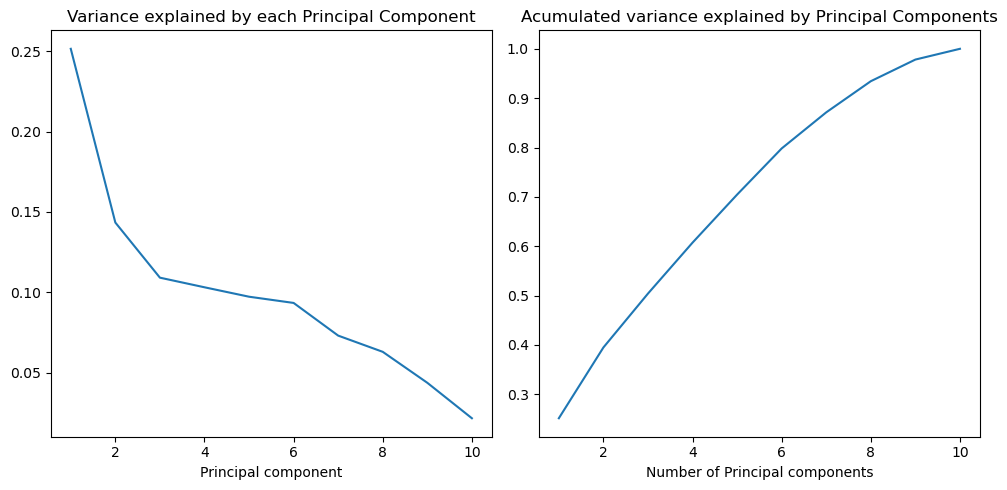

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(np.arange(1,11), pca.explained_variance_ratio_)
ax[0].set_xlabel("Principal component")
ax[0].set_title("Variance explained by each Principal Component")
ax[1].plot(np.arange(1,11),cumulated_explained_variance_ratio)
ax[1].set_title("Acumulated variance explained by Principal Components")
ax[1].set_xlabel("Number of Principal components")
plt.tight_layout()
plt.show()

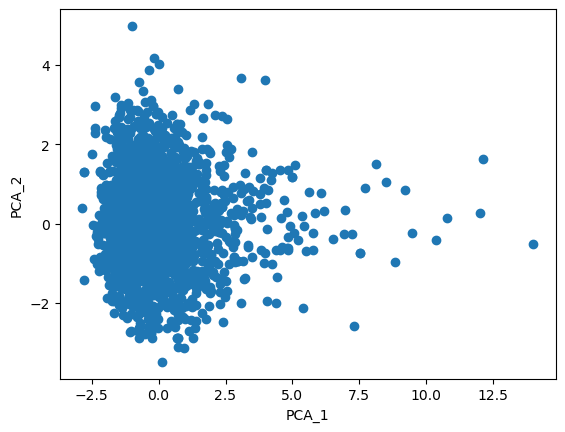

In [17]:
fig, ax = plt.subplots()
ax.scatter(principal_components_df['PCA_1'],principal_components_df['PCA_2'])
ax.set_xlabel("PCA_1")
ax.set_ylabel("PCA_2")
plt.show()

In [18]:
#PCA doesnt work

## ISOMAP

In [19]:
#ISOMAP

from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=12, n_components=2)
iso.fit(X)
X_isomap_transformed = iso.transform(X)
X_isomap_transformed_df = pd.DataFrame(X_isomap_transformed, columns=["ISO_1","ISO_2"])
X_isomap_transformed_df.head()

,ISO_1,ISO_2
0,16.890659,6.589845
1,-56.231819,-6.614025
2,10.124884,0.054458
3,22.707105,2.297012
4,48.329554,6.276096


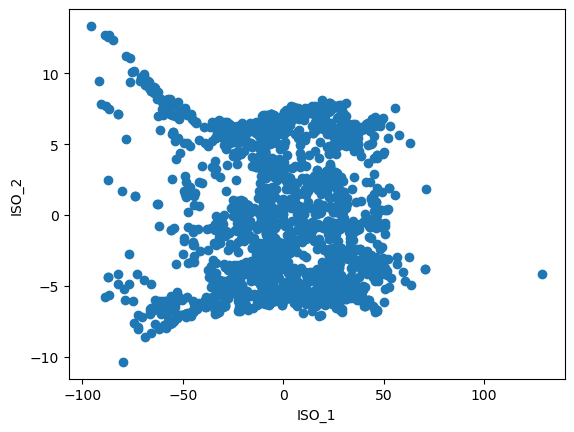

In [20]:
fig, ax = plt.subplots()
ax.scatter(X_isomap_transformed_df['ISO_1'],X_isomap_transformed_df['ISO_2'])
ax.set_xlabel("ISO_1")
ax.set_ylabel("ISO_2")
plt.show()

## TSNE

In [21]:
#TSNE

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=100, init='random', perplexity=40, random_state=12)

X_tsne_transformed = tsne.fit_transform(X)
X_tsne_transformed_df = pd.DataFrame(X_tsne_transformed, columns=["TSNE_1","TSNE_2"])
X_tsne_transformed_df.head()

,TSNE_1,TSNE_2
0,29.369286,-25.379694
1,-0.878528,46.308193
2,7.412775,-29.205271
3,25.681490,-14.987667
4,43.142448,24.723066


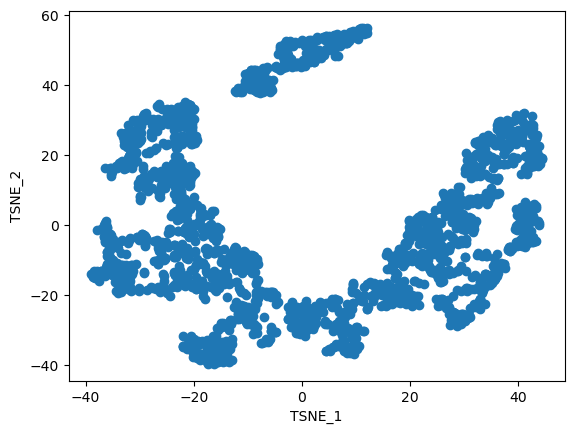

In [22]:
fig, ax = plt.subplots()
ax.scatter(X_tsne_transformed_df['TSNE_1'],X_tsne_transformed_df['TSNE_2'])
ax.set_xlabel("TSNE_1")
ax.set_ylabel("TSNE_2")
plt.show()

## UMAP = 2

In [88]:
#UMAP

from umap import UMAP

reducer = UMAP(n_components=2,random_state=42)
reducer.fit(X)

X_umap_transformed = reducer.transform(X)
X_umap_transformed_df = pd.DataFrame(X_umap_transformed, columns=["UMAP_1","UMAP_2"])
X_umap_transformed_df.head()

C:\Users\joaco\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


,UMAP_1,UMAP_2
0,-3.796060,8.062485
1,13.236357,0.661808
2,-1.817169,10.173134
3,-2.661006,3.860967
4,-2.188247,-3.334076


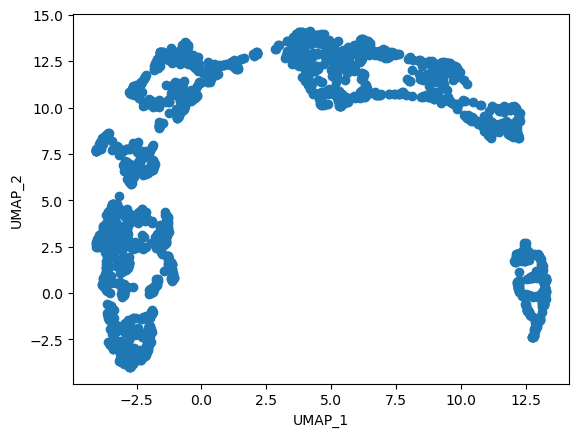

In [89]:
fig, ax = plt.subplots()
ax.scatter(X_umap_transformed_df['UMAP_1'],X_umap_transformed_df['UMAP_2'])
ax.set_xlabel("UMAP_1")
ax.set_ylabel("UMAP_2")
plt.show()

# Clustering

## K-Mean

In [25]:
# Now we have to clusterize

import pandas as pd
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [26]:
X_scaled_df.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2.100000e+03,2.100000e+03,2.100000e+03,2.100000e+03,2.100000e+03,2.100000e+03,2.100000e+03,2.100000e+03,2.100000e+03,2.100000e+03
mean,-1.624098e-16,-9.304726e-17,-6.597897e-17,-1.218073e-16,4.398598e-17,6.428720e-17,-7.612958e-18,-1.624098e-16,-5.413659e-17,-6.090366e-17
std,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00,1.000238e+00
min,-4.677900e+00,-4.252673e+00,-1.496741e+00,-1.262439e+01,-1.065563e+00,-7.318802e-01,-2.082551e-01,-1.128055e+00,-2.405398e+00,-4.414692e+00
25%,-6.407407e-01,-5.979866e-01,-9.434170e-01,-3.569789e-01,-6.560431e-01,-6.571354e-01,-2.082551e-01,-6.448496e-01,-7.573023e-01,-7.757789e-01
50%,6.259706e-02,1.384209e-01,1.632305e-01,1.566809e-01,-4.502465e-01,-4.315086e-01,-2.082551e-01,-3.990205e-01,4.009160e-02,-2.808344e-03
75%,6.885677e-01,7.606100e-01,7.165543e-01,5.950216e-01,2.407531e-01,2.320115e-01,-2.076184e-01,3.898870e-01,7.986153e-01,5.488081e-01
max,2.179644e+00,1.740483e+00,1.546540e+00,2.496006e+00,4.429258e+00,4.207638e+00,7.280166e+00,5.560048e+00,1.921408e+00,3.336224e+00


In [27]:
#We pick random clusters

kmeans = KMeans(n_clusters=6, random_state=1234)
kmeans.fit(X_scaled_df)

C:\Users\joaco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6, random_state=1234)

In [28]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index() # Number of wines in each cluster

0    250
1    593
2    703
3    215
4     56
5    283
Name: count, dtype: int64

In [29]:
#X_df = pd.DataFrame(X)
X["cluster"] = clusters
X.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.943,0.558,2,-4.911,0.0568,0.0026,0.000002,0.0937,0.606,104.983,2
1,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994,1
2,0.750,0.733,6,-3.180,0.0319,0.2560,0.000000,0.1140,0.844,111.018,2
3,0.868,0.538,5,-8.603,0.1740,0.2690,0.000003,0.0901,0.732,99.968,5
4,0.429,0.453,0,-7.746,0.0459,0.5540,0.000002,0.1020,0.155,77.639,3


In [30]:
#To get a sample of 5, for recommendation, hay que darle input de una cancion, buscar el cluster y usar ese para buscar otros

X[X['cluster'] == 5].sample(5)
#sample 5 to get 5 recommendations! 

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
403,0.646,0.770,2,-6.596,0.226,0.00249,0.0000,0.0715,0.681,99.165,5
1978,0.863,0.471,6,-9.545,0.477,0.24700,0.0000,0.1210,0.643,140.969,5
57,0.841,0.738,7,-7.455,0.307,0.52000,0.0000,0.0892,0.484,169.918,5
1872,0.912,0.412,7,-8.074,0.123,0.01650,0.0126,0.1040,0.423,154.983,5
1885,0.876,0.519,11,-6.531,0.143,0.20200,0.0000,0.1080,0.158,94.981,5


In [31]:
# Determine the features of a "typical" cluster del song recommender
# estos van a ser los tipicos songs de cada cluster (de los 7 que se generaron)
pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns[:-1])

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.624328,0.809004,5.412000,-4.760640,0.104637,0.073609,0.006036,0.469008,0.601784,124.702648
1,0.581459,0.733528,4.790894,-5.319354,0.065729,0.075418,0.008496,0.151773,0.362762,127.113639
2,0.748267,0.754866,5.918919,-5.000777,0.071746,0.109014,0.006391,0.127439,0.725168,115.562385
3,0.588684,0.441867,5.702326,-8.796414,0.066493,0.521954,0.009414,0.149300,0.358788,109.840981
4,0.605929,0.565338,5.125000,-11.491393,0.066066,0.332093,0.775857,0.145009,0.396379,123.319821
5,0.739548,0.675375,5.275618,-6.185770,0.290689,0.131339,0.003580,0.156884,0.573866,119.750739


In [32]:
#Using KMEAN Manual, so as to find out the K

kmeans.inertia_

12547.431784264101

In [33]:
kmeans2 = KMeans(n_clusters=8, # Number of clusters/groups
                init="random",
                n_init=3, # Number starting locations for the centroids
                max_iter=2, # Maximum amount of times the centroid's locations are going to be updated (default value = 300)
                tol=0, # Maximum displacement of the centroid's location
                algorithm="full",
                random_state=1234)

kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

12469.30683376839


C:\Users\joaco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1420: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


C:\Users\joaco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 2 clusters! 

Initialization complete
Iteration 0, inertia 27463.780395034813.
Iteration 1, inertia 19505.78486703972.
Iteration 2, inertia 19310.295749897585.
Iteration 3, inertia 19195.873209218604.
Iteration 4, inertia 19122.45852644493.
Iteration 5, inertia 19046.893972337577.
Iteration 6, inertia 18951.913575104696.
Iteration 7, inertia 18852.732743865352.
Iteration 8, inertia 18731.77742958642.
Iteration 9, inertia 18590.02690378225.
Iteration 10, inertia 18443.156575389417.
Iteration 11, inertia 18332.933851417107.
Iteration 12, inertia 18233.14198976603.
Iteration 13, inertia 18163.774735023806.
Iteration 14, inertia 18112.096262002025.
Iteration 15, inertia 18093.004935266115.
Iteration 16, inertia 18081.50837979935.
Iteration 17, inertia 18075.345030416138.
Iteration 18, inertia 18072.340856335948.
Iteration 19, inertia 18069.202748882475.
Iteration 20, inertia 18067.185262568568.
Iteration 21, inertia 18066.123556251678.
Iteration 22, inertia 18

Training a K-Means model with 3 clusters! 

Initialization complete
Iteration 0, inertia 21401.536620462604.
Iteration 1, inertia 16836.83165203529.
Iteration 2, inertia 16669.18147000689.
Iteration 3, inertia 16586.388145801033.
Iteration 4, inertia 16526.04491671689.
Iteration 5, inertia 16476.47505201103.
Iteration 6, inertia 16422.230271892204.
Iteration 7, inertia 16379.035031369882.
Iteration 8, inertia 16348.94644762642.
Iteration 9, inertia 16323.678259652132.
Iteration 10, inertia 16307.68276115272.
Iteration 11, inertia 16294.246650585026.
Iteration 12, inertia 16286.95888656956.
Iteration 13, inertia 16282.35260607561.
Iteration 14, inertia 16279.697505446276.
Iteration 15, inertia 16277.89725914226.
Iteration 16, inertia 16276.777605418349.
Iteration 17, inertia 16275.69598806366.
Iteration 18, inertia 16274.952420869442.
Iteration 19, inertia 16274.705196009945.
Iteration 20, inertia 16274.538247028428.
Converged at iteration 20: center shift 1.3676098191696293e-05 within 

C:\Users\joaco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 22596.980420990767.
Iteration 1, inertia 16728.930258909942.
Iteration 2, inertia 16525.489695989305.
Iteration 3, inertia 16466.54506447595.
Iteration 4, inertia 16437.86597841821.
Iteration 5, inertia 16409.995964872876.
Iteration 6, inertia 16388.360243475243.
Iteration 7, inertia 16373.38245679229.
Iteration 8, inertia 16362.659070826574.
Iteration 9, inertia 16353.006275761176.
Iteration 10, inertia 16342.615008915986.
Iteration 11, inertia 16331.352911388758.
Iteration 12, inertia 16316.63731026923.
Iteration 13, inertia 16306.656914215893.
Iteration 14, inertia 16300.270049444662.
Iteration 15, inertia 16293.674039103877.
Iteration 16, inertia 16287.077879609367.
Iteration 17, inertia 16284.056292944108.
Iteration 18, inertia 16283.198811796854.
Iteration 19, inertia 16281.677924911084.
Iteration 20, inertia 16280.190465024461.
Iteration 21, inertia 16279.649781509444.
Iteration 22, inertia 16279.518053641561.
Converged at iteration 22: strict convergence.
I

C:\Users\joaco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 18450.677344638305.
Iteration 1, inertia 15514.662120959838.
Iteration 2, inertia 15358.284771452983.
Iteration 3, inertia 15318.925063295443.
Iteration 4, inertia 15301.127022938377.
Iteration 5, inertia 15294.973969991415.
Iteration 6, inertia 15292.83303013422.
Iteration 7, inertia 15291.59390511217.
Iteration 8, inertia 15290.736755672318.
Iteration 9, inertia 15289.51850938254.
Iteration 10, inertia 15288.80938996481.
Iteration 11, inertia 15288.383630859584.
Iteration 12, inertia 15288.119825094864.
Converged at iteration 12: center shift 7.985312927088195e-05 within tolerance 9.999999999999986e-05.
Initialization complete
Iteration 0, inertia 24365.1244246445.
Iteration 1, inertia 17414.68777243367.
Iteration 2, inertia 16772.35680076172.
Iteration 3, inertia 16306.038089754331.
Iteration 4, inertia 16039.737971320159.
Iteration 5, inertia 15856.661172656584.
Iteration 6, inertia 15634.948697020543.
Iteration 7, inertia 15232.16866403798.
Iteration 8, inerti

C:\Users\joaco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 19216.18605854169.
Iteration 1, inertia 14156.294003960531.
Iteration 2, inertia 13917.468297931335.
Iteration 3, inertia 13813.809859489256.
Iteration 4, inertia 13740.51112970084.
Iteration 5, inertia 13680.797954825843.
Iteration 6, inertia 13625.21476143285.
Iteration 7, inertia 13580.277943224244.
Iteration 8, inertia 13545.283795568352.
Iteration 9, inertia 13522.215880769023.
Iteration 10, inertia 13503.578177359528.
Iteration 11, inertia 13496.48250146729.
Iteration 12, inertia 13495.646392851868.
Iteration 13, inertia 13494.724868952286.
Iteration 14, inertia 13494.05133809818.
Iteration 15, inertia 13493.891189326889.
Converged at iteration 15: center shift 7.739063104082234e-05 within tolerance 9.999999999999986e-05.
Initialization complete
Iteration 0, inertia 18781.96385539186.
Iteration 1, inertia 14452.42550809438.
Iteration 2, inertia 14114.35904834877.
Iteration 3, inertia 13970.754596107374.
Iteration 4, inertia 13906.414945496548.
Iteration 5, in

Iteration 0, inertia 20093.273690992275.
Iteration 1, inertia 15203.362951461559.
Iteration 2, inertia 14952.579764391126.
Iteration 3, inertia 14777.445421719798.
Iteration 4, inertia 14608.97563131223.
Iteration 5, inertia 14495.589980097417.
Iteration 6, inertia 14449.052574565601.
Iteration 7, inertia 14422.180075578222.
Iteration 8, inertia 14410.489143786102.
Iteration 9, inertia 14403.638629919034.
Iteration 10, inertia 14397.332178265622.
Iteration 11, inertia 14384.445107359446.
Iteration 12, inertia 14367.036754854158.
Iteration 13, inertia 14351.530213748094.
Iteration 14, inertia 14343.263006670792.
Iteration 15, inertia 14336.814965519196.
Iteration 16, inertia 14332.832425345283.
Iteration 17, inertia 14329.091575665654.
Iteration 18, inertia 14324.787009158455.
Iteration 19, inertia 14321.601216259947.
Iteration 20, inertia 14318.448322557068.
Iteration 21, inertia 14316.210800344845.
Iteration 22, inertia 14313.25441444615.
Iteration 23, inertia 14309.83824663833.
Itera

C:\Users\joaco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 17323.363466957715.
Iteration 1, inertia 13379.065827395736.
Iteration 2, inertia 13087.921738639589.
Iteration 3, inertia 12983.943373552624.
Iteration 4, inertia 12932.219749382159.
Iteration 5, inertia 12903.727058577711.
Iteration 6, inertia 12879.84955253285.
Iteration 7, inertia 12860.01727841799.
Iteration 8, inertia 12847.90215697354.
Iteration 9, inertia 12829.094342407814.
Iteration 10, inertia 12806.583931182377.
Iteration 11, inertia 12783.944132759372.
Iteration 12, inertia 12767.720392298748.
Iteration 13, inertia 12755.503636131467.
Iteration 14, inertia 12738.403150782156.
Iteration 15, inertia 12714.861888746416.
Iteration 16, inertia 12694.906132864147.
Iteration 17, inertia 12672.95988454685.
Iteration 18, inertia 12656.480382976379.
Iteration 19, inertia 12637.441560988902.
Iteration 20, inertia 12618.846477263252.
Iteration 21, inertia 12608.309824033418.
Iteration 22, inertia 12598.376126072046.
Iteration 23, inertia 12584.207577204857.
Iterat

Iteration 0, inertia 17515.47466371643.
Iteration 1, inertia 13532.937555086437.
Iteration 2, inertia 13052.802160231638.
Iteration 3, inertia 12871.9510984119.
Iteration 4, inertia 12811.56353577781.
Iteration 5, inertia 12769.113339361924.
Iteration 6, inertia 12727.497769232148.
Iteration 7, inertia 12702.689460202922.
Iteration 8, inertia 12682.119700544987.
Iteration 9, inertia 12655.10575923565.
Iteration 10, inertia 12623.720017404925.
Iteration 11, inertia 12595.547681282365.
Iteration 12, inertia 12569.916326633178.
Iteration 13, inertia 12558.1887358684.
Iteration 14, inertia 12552.846553307623.
Iteration 15, inertia 12551.020090328346.
Iteration 16, inertia 12549.935306476675.
Iteration 17, inertia 12549.37547519804.
Iteration 18, inertia 12548.926400317769.
Iteration 19, inertia 12548.649363461045.
Iteration 20, inertia 12548.27618068338.
Iteration 21, inertia 12547.520797721316.
Iteration 22, inertia 12547.431784264101.
Converged at iteration 22: strict convergence.
Initia

C:\Users\joaco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 16718.900068183873.
Iteration 1, inertia 12721.323576492687.
Iteration 2, inertia 12406.760473657618.
Iteration 3, inertia 12347.362386407369.
Iteration 4, inertia 12321.680758862607.
Iteration 5, inertia 12302.522864980507.
Iteration 6, inertia 12277.82204895216.
Iteration 7, inertia 12244.234047608614.
Iteration 8, inertia 12220.101578127324.
Iteration 9, inertia 12200.660483541677.
Iteration 10, inertia 12177.560971634093.
Iteration 11, inertia 12121.914897351839.
Iteration 12, inertia 12055.390534741124.
Iteration 13, inertia 11978.15284242263.
Iteration 14, inertia 11927.158687272611.
Iteration 15, inertia 11911.010142156487.
Iteration 16, inertia 11906.364675402412.
Iteration 17, inertia 11904.467659758178.
Iteration 18, inertia 11903.614101228162.
Iteration 19, inertia 11902.98071285133.
Iteration 20, inertia 11902.649746946694.
Iteration 21, inertia 11902.404404149049.
Iteration 22, inertia 11902.257080475485.
Converged at iteration 22: strict convergence.


Iteration 0, inertia 16635.05671516465.
Iteration 1, inertia 12574.188821510133.
Iteration 2, inertia 12160.488694690466.
Iteration 3, inertia 12049.907434431996.
Iteration 4, inertia 12012.352559621064.
Iteration 5, inertia 11989.329800504753.
Iteration 6, inertia 11974.609012937408.
Iteration 7, inertia 11962.053792102017.
Iteration 8, inertia 11955.739931652155.
Iteration 9, inertia 11951.623119426844.
Iteration 10, inertia 11947.240799739178.
Iteration 11, inertia 11941.379328458546.
Iteration 12, inertia 11936.567143015196.
Iteration 13, inertia 11928.88757165079.
Iteration 14, inertia 11923.850858940035.
Iteration 15, inertia 11921.45342311039.
Iteration 16, inertia 11918.64163977417.
Iteration 17, inertia 11916.230445230247.
Iteration 18, inertia 11915.256134267023.
Iteration 19, inertia 11914.585971337516.
Iteration 20, inertia 11913.505768699488.
Iteration 21, inertia 11912.524566025459.
Iteration 22, inertia 11911.985272012653.
Iteration 23, inertia 11911.82021661088.
Converg

C:\Users\joaco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 16389.827925152753.
Iteration 1, inertia 12728.445369710022.
Iteration 2, inertia 12148.870422374352.
Iteration 3, inertia 11869.504251800834.
Iteration 4, inertia 11735.338950765014.
Iteration 5, inertia 11674.74016874485.
Iteration 6, inertia 11622.213531225521.
Iteration 7, inertia 11586.915154910865.
Iteration 8, inertia 11556.626282500969.
Iteration 9, inertia 11506.681239809914.
Iteration 10, inertia 11452.317277138778.
Iteration 11, inertia 11423.705274296599.
Iteration 12, inertia 11403.593269261375.
Iteration 13, inertia 11394.894367489933.
Iteration 14, inertia 11390.279476922904.
Iteration 15, inertia 11387.431906531498.
Iteration 16, inertia 11383.822330128573.
Iteration 17, inertia 11377.836021033469.
Iteration 18, inertia 11372.639057533443.
Iteration 19, inertia 11368.929750116065.
Iteration 20, inertia 11365.224476993737.
Iteration 21, inertia 11359.3142466084.
Iteration 22, inertia 11354.756277143248.
Iteration 23, inertia 11350.566391556353.
Itera

Iteration 0, inertia 15576.907710254505.
Iteration 1, inertia 12606.931242812667.
Iteration 2, inertia 12156.308506620417.
Iteration 3, inertia 11929.655183664458.
Iteration 4, inertia 11791.083328513181.
Iteration 5, inertia 11713.218695471855.
Iteration 6, inertia 11661.451667053674.
Iteration 7, inertia 11616.024315971623.
Iteration 8, inertia 11559.445633208366.
Iteration 9, inertia 11525.365962429336.
Iteration 10, inertia 11502.15140855228.
Iteration 11, inertia 11486.344130553583.
Iteration 12, inertia 11477.563941960401.
Iteration 13, inertia 11468.259736723114.
Iteration 14, inertia 11454.879519722479.
Iteration 15, inertia 11433.970285106989.
Iteration 16, inertia 11408.265747099314.
Iteration 17, inertia 11390.963151491938.
Iteration 18, inertia 11376.326910371608.
Iteration 19, inertia 11360.817145791858.
Iteration 20, inertia 11348.679063218637.
Iteration 21, inertia 11340.161410295885.
Iteration 22, inertia 11336.48309751525.
Iteration 23, inertia 11334.771181407801.
Iter

C:\Users\joaco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 15775.218231955612.
Iteration 1, inertia 11820.565979606436.
Iteration 2, inertia 11448.66757003173.
Iteration 3, inertia 11207.830869738733.
Iteration 4, inertia 11061.711422606055.
Iteration 5, inertia 10985.170658485527.
Iteration 6, inertia 10952.55692295513.
Iteration 7, inertia 10937.463643967983.
Iteration 8, inertia 10932.05071655134.
Iteration 9, inertia 10930.736834036134.
Iteration 10, inertia 10930.365276757853.
Iteration 11, inertia 10929.718931252266.
Iteration 12, inertia 10929.029355963798.
Iteration 13, inertia 10928.292848061887.
Iteration 14, inertia 10927.428056950537.
Iteration 15, inertia 10926.865635495098.
Iteration 16, inertia 10926.718321154724.
Converged at iteration 16: center shift 5.863515549449435e-05 within tolerance 9.999999999999986e-05.
Initialization complete
Iteration 0, inertia 14667.889040793767.
Iteration 1, inertia 11502.08318885074.
Iteration 2, inertia 11096.327728566994.
Iteration 3, inertia 10863.

Training a K-Means model with 10 clusters! 

Initialization complete
Iteration 0, inertia 13789.095080907799.
Iteration 1, inertia 11356.819679832624.
Iteration 2, inertia 11138.909852979563.
Iteration 3, inertia 11041.697512521543.
Iteration 4, inertia 10954.818796977857.
Iteration 5, inertia 10891.931680555383.
Iteration 6, inertia 10847.05030630645.
Iteration 7, inertia 10809.753928716278.
Iteration 8, inertia 10783.128949658523.
Iteration 9, inertia 10766.308806665947.
Iteration 10, inertia 10758.058049955873.
Iteration 11, inertia 10752.913561851248.
Iteration 12, inertia 10745.656374355063.
Iteration 13, inertia 10740.712122684541.
Iteration 14, inertia 10733.725319537083.
Iteration 15, inertia 10728.128046701.
Iteration 16, inertia 10724.568459143678.
Iteration 17, inertia 10720.881069733994.
Iteration 18, inertia 10717.376908538241.
Iteration 19, inertia 10715.189610170659.
Iteration 20, inertia 10708.959567884496.
Iteration 21, inertia 10698.47062150576.
Iteration 22, inertia 

C:\Users\joaco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 14150.734127857031.
Iteration 1, inertia 11925.112990621363.
Iteration 2, inertia 11257.98979291977.
Iteration 3, inertia 10797.179726189464.
Iteration 4, inertia 10562.139569115237.
Iteration 5, inertia 10484.50138016587.
Iteration 6, inertia 10463.481845700337.
Iteration 7, inertia 10457.468095690254.
Iteration 8, inertia 10450.486342818871.
Iteration 9, inertia 10445.317928923692.
Iteration 10, inertia 10442.200010164413.
Iteration 11, inertia 10440.063088207939.
Iteration 12, inertia 10438.071868764231.
Iteration 13, inertia 10435.928865877431.
Iteration 14, inertia 10432.401456506883.
Iteration 15, inertia 10427.250189939437.
Iteration 16, inertia 10421.627917531228.
Iteration 17, inertia 10418.190313736566.
Iteration 18, inertia 10415.364334585098.
Iteration 19, inertia 10412.178746247528.
Iteration 20, inertia 10409.152883436753.
Iteration 21, inertia 10406.732533327187.
Iteration 22, inertia 10403.708545679561.
Iteration 23, inertia 10401.598059121485.
Iter

Iteration 12, inertia 10269.050536303406.
Iteration 13, inertia 10259.384771515059.
Iteration 14, inertia 10253.118688181226.
Iteration 15, inertia 10247.547988642473.
Iteration 16, inertia 10242.99234108815.
Iteration 17, inertia 10240.889452747457.
Iteration 18, inertia 10239.630831745175.
Iteration 19, inertia 10237.662280717082.
Iteration 20, inertia 10236.873320445504.
Iteration 21, inertia 10235.922603131037.
Iteration 22, inertia 10234.736673476049.
Iteration 23, inertia 10234.19143376259.
Iteration 24, inertia 10234.03842373011.
Iteration 25, inertia 10233.975902851984.
Iteration 26, inertia 10233.818114780555.
Iteration 27, inertia 10233.611451547564.
Iteration 28, inertia 10233.380544959336.
Converged at iteration 28: strict convergence.
Initialization complete
Iteration 0, inertia 14581.919900179555.
Iteration 1, inertia 11888.640117737548.
Iteration 2, inertia 11435.883970693341.
Iteration 3, inertia 11166.416678300682.
Iteration 4, inertia 10987.521913525381.
Iteration 5, 

C:\Users\joaco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 9, inertia 10064.182200900028.
Iteration 10, inertia 10054.18446686186.
Iteration 11, inertia 10046.191051108104.
Iteration 12, inertia 10035.738227367165.
Iteration 13, inertia 10022.950957858135.
Iteration 14, inertia 10012.140300792216.
Iteration 15, inertia 10002.786379963987.
Iteration 16, inertia 9995.912433560661.
Iteration 17, inertia 9993.11005755901.
Iteration 18, inertia 9989.375382624788.
Iteration 19, inertia 9985.111414745998.
Iteration 20, inertia 9981.432105177102.
Iteration 21, inertia 9978.695561031385.
Iteration 22, inertia 9976.50159762027.
Iteration 23, inertia 9974.482348422305.
Iteration 24, inertia 9972.60994450547.
Iteration 25, inertia 9971.550596562647.
Iteration 26, inertia 9970.059038498955.
Iteration 27, inertia 9968.446763678206.
Iteration 28, inertia 9965.509849136415.
Iteration 29, inertia 9964.485585121027.
Iteration 30, inertia 9964.095638448718.
Iteration 31, inertia 9963.831019858819.
Iteration 32, inertia 9963.74379560252.
Converged at it

Training a K-Means model with 12 clusters! 

Initialization complete
Iteration 0, inertia 12842.092182449282.
Iteration 1, inertia 10818.377697609616.
Iteration 2, inertia 10573.466750984302.
Iteration 3, inertia 10442.783404753622.
Iteration 4, inertia 10358.955735978125.
Iteration 5, inertia 10311.185214801022.
Iteration 6, inertia 10284.014308707821.
Iteration 7, inertia 10266.072637058032.
Iteration 8, inertia 10253.946819428355.
Iteration 9, inertia 10247.206484050554.
Iteration 10, inertia 10239.680110273426.
Iteration 11, inertia 10231.627622553402.
Iteration 12, inertia 10220.997507401107.
Iteration 13, inertia 10213.81624434551.
Iteration 14, inertia 10208.719498847979.
Iteration 15, inertia 10202.636057296746.
Iteration 16, inertia 10197.59784152788.
Iteration 17, inertia 10192.048395484071.
Iteration 18, inertia 10186.859939221502.
Iteration 19, inertia 10182.239403126217.
Iteration 20, inertia 10177.465195493696.
Iteration 21, inertia 10171.663406016389.
Iteration 22, inert

C:\Users\joaco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 14604.75860260774.
Iteration 1, inertia 11294.79515266258.
Iteration 2, inertia 10805.217706576379.
Iteration 3, inertia 10590.454272039971.
Iteration 4, inertia 10445.12906122.
Iteration 5, inertia 10368.513872999107.
Iteration 6, inertia 10318.1896568254.
Iteration 7, inertia 10277.067942564074.
Iteration 8, inertia 10247.173427078053.
Iteration 9, inertia 10223.690958832121.
Iteration 10, inertia 10193.037804951264.
Iteration 11, inertia 10173.753801455818.
Iteration 12, inertia 10158.28248736445.
Iteration 13, inertia 10140.111503699487.
Iteration 14, inertia 10122.632705859158.
Iteration 15, inertia 10111.734584706175.
Iteration 16, inertia 10105.884363473233.
Iteration 17, inertia 10102.91363254427.
Iteration 18, inertia 10101.710317813571.
Iteration 19, inertia 10101.297724185508.
Iteration 20, inertia 10100.785171696476.
Iteration 21, inertia 10099.871848743114.
Iteration 22, inertia 10098.64434111577.
Iteration 23, inertia 10097.118980642219.
Iteration 24,

Iteration 0, inertia 13695.62758408087.
Iteration 1, inertia 10951.273857398039.
Iteration 2, inertia 10578.773839557363.
Iteration 3, inertia 10397.600108083621.
Iteration 4, inertia 10295.61325312089.
Iteration 5, inertia 10205.838315763003.
Iteration 6, inertia 10135.617497434954.
Iteration 7, inertia 10095.42011516709.
Iteration 8, inertia 10044.257302223308.
Iteration 9, inertia 9927.672963595622.
Iteration 10, inertia 9751.721454733157.
Iteration 11, inertia 9629.630610547.
Iteration 12, inertia 9601.48922155895.
Iteration 13, inertia 9597.984962579978.
Iteration 14, inertia 9595.093981010974.
Iteration 15, inertia 9594.262208423846.
Iteration 16, inertia 9593.644461715274.
Iteration 17, inertia 9593.031667734418.
Iteration 18, inertia 9592.717583090222.
Iteration 19, inertia 9592.396998668984.
Iteration 20, inertia 9592.218653305052.
Iteration 21, inertia 9592.03019059812.
Iteration 22, inertia 9591.580247829872.
Converged at iteration 22: strict convergence.
Initialization comp

C:\Users\joaco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 13543.215630594714.
Iteration 1, inertia 10445.846101857966.
Iteration 2, inertia 10080.376903866047.
Iteration 3, inertia 9892.056595458564.
Iteration 4, inertia 9749.56845656152.
Iteration 5, inertia 9637.678335300434.
Iteration 6, inertia 9564.976991379122.
Iteration 7, inertia 9499.85820775005.
Iteration 8, inertia 9438.08943595201.
Iteration 9, inertia 9392.95651073177.
Iteration 10, inertia 9362.604368655662.
Iteration 11, inertia 9346.61577591391.
Iteration 12, inertia 9335.574779325816.
Iteration 13, inertia 9322.972810713853.
Iteration 14, inertia 9314.985383621195.
Iteration 15, inertia 9309.13052905127.
Iteration 16, inertia 9306.497920024867.
Iteration 17, inertia 9306.086241707892.
Iteration 18, inertia 9305.8609474594.
Iteration 19, inertia 9305.707743689987.
Iteration 20, inertia 9305.180708651444.
Iteration 21, inertia 9304.689831766096.
Iteration 22, inertia 9304.407932327216.
Iteration 23, inertia 9303.881792578348.
Iteration 24, inertia 9303.2006

Iteration 0, inertia 13283.524621007118.
Iteration 1, inertia 10646.354891883053.
Iteration 2, inertia 10119.69240352217.
Iteration 3, inertia 9810.842179136545.
Iteration 4, inertia 9696.731936737497.
Iteration 5, inertia 9645.741708188982.
Iteration 6, inertia 9622.870222029866.
Iteration 7, inertia 9609.741429232836.
Iteration 8, inertia 9595.8641335723.
Iteration 9, inertia 9580.83200256567.
Iteration 10, inertia 9562.770458414612.
Iteration 11, inertia 9542.679690167473.
Iteration 12, inertia 9518.852722412148.
Iteration 13, inertia 9505.148528373004.
Iteration 14, inertia 9498.495331449141.
Iteration 15, inertia 9494.984062252426.
Iteration 16, inertia 9491.724998690786.
Iteration 17, inertia 9490.066633396533.
Iteration 18, inertia 9488.922984579098.
Iteration 19, inertia 9487.051472631456.
Iteration 20, inertia 9485.098552736228.
Iteration 21, inertia 9481.389582303465.
Iteration 22, inertia 9476.678620781218.
Iteration 23, inertia 9474.510519959844.
Iteration 24, inertia 9472.

C:\Users\joaco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 12829.994765421303.
Iteration 1, inertia 10589.790684371093.
Iteration 2, inertia 9739.739097359754.
Iteration 3, inertia 9382.084876860983.
Iteration 4, inertia 9268.753482456734.
Iteration 5, inertia 9243.184171326786.
Iteration 6, inertia 9230.569413620513.
Iteration 7, inertia 9220.120633047345.
Iteration 8, inertia 9213.925075516901.
Iteration 9, inertia 9201.781113361412.
Iteration 10, inertia 9193.100225824604.
Iteration 11, inertia 9177.052338076888.
Iteration 12, inertia 9162.420597151435.
Iteration 13, inertia 9153.306330750602.
Iteration 14, inertia 9148.786714237169.
Iteration 15, inertia 9145.008768033746.
Iteration 16, inertia 9142.0407556782.
Iteration 17, inertia 9140.426665693183.
Iteration 18, inertia 9139.34245204187.
Iteration 19, inertia 9138.592569005395.
Iteration 20, inertia 9138.092447576872.
Iteration 21, inertia 9137.78798861148.
Iteration 22, inertia 9137.42916251958.
Iteration 23, inertia 9137.338191951114.
Iteration 24, inertia 9137.12

Iteration 0, inertia 13244.056335995669.
Iteration 1, inertia 10233.250259390277.
Iteration 2, inertia 9748.307819728809.
Iteration 3, inertia 9553.870541916138.
Iteration 4, inertia 9480.211192889332.
Iteration 5, inertia 9439.871173532389.
Iteration 6, inertia 9400.524409562524.
Iteration 7, inertia 9370.92294456856.
Iteration 8, inertia 9341.863216819214.
Iteration 9, inertia 9313.779350110213.
Iteration 10, inertia 9291.679322527636.
Iteration 11, inertia 9276.0483265228.
Iteration 12, inertia 9262.447529007728.
Iteration 13, inertia 9245.056674686797.
Iteration 14, inertia 9228.988632798133.
Iteration 15, inertia 9221.75442423211.
Iteration 16, inertia 9214.649198215891.
Iteration 17, inertia 9204.962614082579.
Iteration 18, inertia 9197.967883976045.
Iteration 19, inertia 9187.512500835257.
Iteration 20, inertia 9178.816289762199.
Iteration 21, inertia 9173.43132828191.
Iteration 22, inertia 9169.742335054301.
Iteration 23, inertia 9165.859125752047.
Iteration 24, inertia 9164.55

C:\Users\joaco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 19, inertia 9019.501172135466.
Iteration 20, inertia 9012.972862038838.
Iteration 21, inertia 9007.796132684129.
Iteration 22, inertia 9005.876792232462.
Iteration 23, inertia 9005.539379508764.
Iteration 24, inertia 9004.585145959254.
Iteration 25, inertia 9003.878761749476.
Iteration 26, inertia 9003.819237811542.
Iteration 27, inertia 9003.737488010644.
Converged at iteration 27: strict convergence.
Initialization complete
Iteration 0, inertia 12796.606044877813.
Iteration 1, inertia 10236.25441586075.
Iteration 2, inertia 9826.689043956841.
Iteration 3, inertia 9552.285063617885.
Iteration 4, inertia 9376.794661205447.
Iteration 5, inertia 9276.040417848719.
Iteration 6, inertia 9208.910300627562.
Iteration 7, inertia 9157.237598830301.
Iteration 8, inertia 9127.631615255668.
Iteration 9, inertia 9108.99120157854.
Iteration 10, inertia 9097.746132685827.
Iteration 11, inertia 9087.437741416417.
Iteration 12, inertia 9082.661163074852.
Iteration 13, inertia 9078.5133222203

Training a K-Means model with 16 clusters! 

Initialization complete
Iteration 0, inertia 11793.712268282856.
Iteration 1, inertia 9614.430755005164.
Iteration 2, inertia 9257.490912346713.
Iteration 3, inertia 9030.468298340078.
Iteration 4, inertia 8930.82866764441.
Iteration 5, inertia 8875.23060842473.
Iteration 6, inertia 8847.334317164306.
Iteration 7, inertia 8836.46630860134.
Iteration 8, inertia 8831.17894774878.
Iteration 9, inertia 8826.32063069497.
Iteration 10, inertia 8822.265516481173.
Iteration 11, inertia 8819.442356059466.
Iteration 12, inertia 8816.072031541296.
Iteration 13, inertia 8811.717783757922.
Iteration 14, inertia 8807.097433638532.
Iteration 15, inertia 8801.493568470632.
Iteration 16, inertia 8797.786156834.
Iteration 17, inertia 8796.356138973673.
Iteration 18, inertia 8796.026350794873.
Iteration 19, inertia 8795.867155654452.
Iteration 20, inertia 8795.810114658305.
Iteration 21, inertia 8795.786126406503.
Converged at iteration 21: strict convergence.

C:\Users\joaco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 12593.705767290787.
Iteration 1, inertia 9746.656794751547.
Iteration 2, inertia 9409.81029297374.
Iteration 3, inertia 9276.58992160304.
Iteration 4, inertia 9185.797872962527.
Iteration 5, inertia 9064.844987729972.
Iteration 6, inertia 8994.72569771438.
Iteration 7, inertia 8939.987240277289.
Iteration 8, inertia 8894.89451383658.
Iteration 9, inertia 8870.168918792679.
Iteration 10, inertia 8862.098597025168.
Iteration 11, inertia 8856.781693550744.
Iteration 12, inertia 8853.223049367538.
Iteration 13, inertia 8849.310598840448.
Iteration 14, inertia 8847.096929328534.
Iteration 15, inertia 8844.59335350009.
Iteration 16, inertia 8842.455445156966.
Iteration 17, inertia 8839.033930524101.
Iteration 18, inertia 8836.81046374896.
Iteration 19, inertia 8832.914860359642.
Iteration 20, inertia 8827.207087189528.
Iteration 21, inertia 8822.532858555121.
Iteration 22, inertia 8818.825749389474.
Iteration 23, inertia 8816.976083609748.
Iterati

Training a K-Means model with 17 clusters! 

Initialization complete
Iteration 0, inertia 11674.166528959815.
Iteration 1, inertia 9515.622542957677.
Iteration 2, inertia 9169.15399970601.
Iteration 3, inertia 8938.239885246456.
Iteration 4, inertia 8840.38319978688.
Iteration 5, inertia 8775.903707379679.
Iteration 6, inertia 8743.18984698829.
Iteration 7, inertia 8719.637415800848.
Iteration 8, inertia 8697.940362190773.
Iteration 9, inertia 8679.1853044596.
Iteration 10, inertia 8667.760882128461.
Iteration 11, inertia 8659.643533783314.
Iteration 12, inertia 8653.360995257333.
Iteration 13, inertia 8648.854850093743.
Iteration 14, inertia 8643.450282770465.
Iteration 15, inertia 8640.661721205426.
Iteration 16, inertia 8639.030037111645.
Iteration 17, inertia 8638.023846675676.
Iteration 18, inertia 8637.075333942736.
Iteration 19, inertia 8636.388909793253.
Iteration 20, inertia 8634.638415398535.
Iteration 21, inertia 8634.187524254374.
Iteration 22, inertia 8633.819845524937.
It

C:\Users\joaco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 12012.68547537096.
Iteration 1, inertia 9440.030328221721.
Iteration 2, inertia 9040.727979499195.
Iteration 3, inertia 8924.989693463169.
Iteration 4, inertia 8883.587419245301.
Iteration 5, inertia 8855.685811693093.
Iteration 6, inertia 8839.24513463147.
Iteration 7, inertia 8828.518102001502.
Iteration 8, inertia 8821.82506124835.
Iteration 9, inertia 8816.510366567189.
Iteration 10, inertia 8808.603758030193.
Iteration 11, inertia 8803.527634270802.
Iteration 12, inertia 8801.865779617914.
Iteration 13, inertia 8800.55068247113.
Iteration 14, inertia 8799.985108129931.
Iteration 15, inertia 8799.789731218632.
Iteration 16, inertia 8799.617073270547.
Iteration 17, inertia 8799.50698118925.
Iteration 18, inertia 8799.316922963497.
Iteration 19, inertia 8799.022651015064.
Iteration 20, inertia 8798.805614662038.
Iteration 21, inertia 8798.727015904213.
Iteration 22, inertia 8798.666338732695.
Iteration 23, inertia 8798.371034841235.
Iteration 24, inertia 8798.253

Training a K-Means model with 18 clusters! 

Initialization complete
Iteration 0, inertia 11366.751992950982.
Iteration 1, inertia 9240.865232072967.
Iteration 2, inertia 8956.116036790845.
Iteration 3, inertia 8815.106905001245.
Iteration 4, inertia 8728.348849494183.
Iteration 5, inertia 8654.091605158072.
Iteration 6, inertia 8619.602487777001.
Iteration 7, inertia 8600.012777736276.
Iteration 8, inertia 8583.561234137014.
Iteration 9, inertia 8563.30861828944.
Iteration 10, inertia 8547.093270547692.
Iteration 11, inertia 8536.599979268103.
Iteration 12, inertia 8527.881391956105.
Iteration 13, inertia 8521.300495564741.
Iteration 14, inertia 8518.283703553156.
Iteration 15, inertia 8516.640982502777.
Iteration 16, inertia 8514.941368742284.
Iteration 17, inertia 8513.019087942408.
Iteration 18, inertia 8512.29899888657.
Iteration 19, inertia 8511.623528302063.
Iteration 20, inertia 8511.265671519144.
Iteration 21, inertia 8511.02163154662.
Iteration 22, inertia 8510.839440528054.


C:\Users\joaco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 11801.302681338166.
Iteration 1, inertia 9327.86620553156.
Iteration 2, inertia 8949.138404532354.
Iteration 3, inertia 8794.938817908109.
Iteration 4, inertia 8683.303851692568.
Iteration 5, inertia 8604.351638204866.
Iteration 6, inertia 8561.034831336243.
Iteration 7, inertia 8545.881099977105.
Iteration 8, inertia 8534.979968063326.
Iteration 9, inertia 8529.768241130114.
Iteration 10, inertia 8525.042179000722.
Iteration 11, inertia 8521.619944057577.
Iteration 12, inertia 8519.935744975417.
Iteration 13, inertia 8518.67909372966.
Iteration 14, inertia 8517.868170032752.
Iteration 15, inertia 8517.088845729828.
Converged at iteration 15: strict convergence.
Initialization complete
Iteration 0, inertia 11395.473566952853.
Iteration 1, inertia 9123.443967761044.
Iteration 2, inertia 8836.542046382143.
Iteration 3, inertia 8727.13684554453.
Iteration 4, inertia 8674.865652248161.
Iteration 5, inertia 8636.237638631916.
Iteration 6, inertia 8613.513452603389.
Iter

Training a K-Means model with 19 clusters! 

Initialization complete
Iteration 0, inertia 11106.835507422831.
Iteration 1, inertia 9018.872412582703.
Iteration 2, inertia 8778.507213595794.
Iteration 3, inertia 8667.644215359214.
Iteration 4, inertia 8593.149790024756.
Iteration 5, inertia 8548.68775989725.
Iteration 6, inertia 8530.104910933725.
Iteration 7, inertia 8519.187838501583.
Iteration 8, inertia 8505.46921444517.
Iteration 9, inertia 8491.911663475177.
Iteration 10, inertia 8477.928219556912.
Iteration 11, inertia 8461.889551131144.
Iteration 12, inertia 8445.214354097101.
Iteration 13, inertia 8432.17138308525.
Iteration 14, inertia 8420.630037675404.
Iteration 15, inertia 8407.670989836432.
Iteration 16, inertia 8392.375994363847.
Iteration 17, inertia 8380.351570660638.
Iteration 18, inertia 8367.369047089465.
Iteration 19, inertia 8357.117506028542.
Iteration 20, inertia 8346.959385357157.
Iteration 21, inertia 8337.568116840808.
Iteration 22, inertia 8327.656767567356.


C:\Users\joaco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 11587.95939320295.
Iteration 1, inertia 9453.106569602716.
Iteration 2, inertia 9136.27534601792.
Iteration 3, inertia 8962.16169970109.
Iteration 4, inertia 8828.767212702216.
Iteration 5, inertia 8697.396861899111.
Iteration 6, inertia 8589.823765372508.
Iteration 7, inertia 8524.764237451996.
Iteration 8, inertia 8484.805135009256.
Iteration 9, inertia 8468.93541136326.
Iteration 10, inertia 8459.57230302889.
Iteration 11, inertia 8452.310287175102.
Iteration 12, inertia 8446.48427154358.
Iteration 13, inertia 8440.913806060937.
Iteration 14, inertia 8436.488707457182.
Iteration 15, inertia 8431.468408539251.
Iteration 16, inertia 8427.484417422122.
Iteration 17, inertia 8424.45585751046.
Iteration 18, inertia 8421.585944369066.
Iteration 19, inertia 8419.378227283714.
Iteration 20, inertia 8415.539782312102.
Iteration 21, inertia 8404.720625400903.
Iteration 22, inertia 8394.303793808862.
Iteration 23, inertia 8388.133129104534.
Iteration 24, inertia 8383.54731

Initialization complete
Iteration 0, inertia 11644.129622806666.
Iteration 1, inertia 9173.98826971012.
Iteration 2, inertia 8761.788454816602.
Iteration 3, inertia 8592.608728499234.
Iteration 4, inertia 8506.984247477294.
Iteration 5, inertia 8454.522138813985.
Iteration 6, inertia 8409.823251615637.
Iteration 7, inertia 8387.418932873823.
Iteration 8, inertia 8377.24966820637.
Iteration 9, inertia 8370.6799609704.
Iteration 10, inertia 8364.941563494715.
Iteration 11, inertia 8361.015436690373.
Iteration 12, inertia 8357.110365421291.
Iteration 13, inertia 8350.795657885179.
Iteration 14, inertia 8344.86221851128.
Iteration 15, inertia 8341.959312310822.
Iteration 16, inertia 8339.658485964705.
Iteration 17, inertia 8335.982585362568.
Iteration 18, inertia 8331.81596796037.
Iteration 19, inertia 8330.710800967714.
Iteration 20, inertia 8330.358821198251.
Iteration 21, inertia 8330.163376945085.
Iteration 22, inertia 8329.966722892821.
Iteration 23, inertia 8329.761678982042.
Iterati

C:\Users\joaco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 10968.944569985775.
Iteration 1, inertia 9043.220877623917.
Iteration 2, inertia 8757.622498553565.
Iteration 3, inertia 8649.736944749851.
Iteration 4, inertia 8578.017864731997.
Iteration 5, inertia 8506.535504975216.
Iteration 6, inertia 8452.38945488185.
Iteration 7, inertia 8401.364571981072.
Iteration 8, inertia 8356.970697541554.
Iteration 9, inertia 8329.853088765565.
Iteration 10, inertia 8312.41080666141.
Iteration 11, inertia 8296.024240299012.
Iteration 12, inertia 8289.16662612081.
Iteration 13, inertia 8285.865497476205.
Iteration 14, inertia 8284.418233269025.
Iteration 15, inertia 8283.206445655407.
Iteration 16, inertia 8282.278203655893.
Iteration 17, inertia 8282.03696109128.
Iteration 18, inertia 8281.87619548789.
Iteration 19, inertia 8281.826094853168.
Iteration 20, inertia 8281.798189214293.
Iteration 21, inertia 8281.751772110681.
Iteration 22, inertia 8281.599218957605.
Iteration 23, inertia 8281.500917027544.
Iteration 24, inertia 8281.463

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

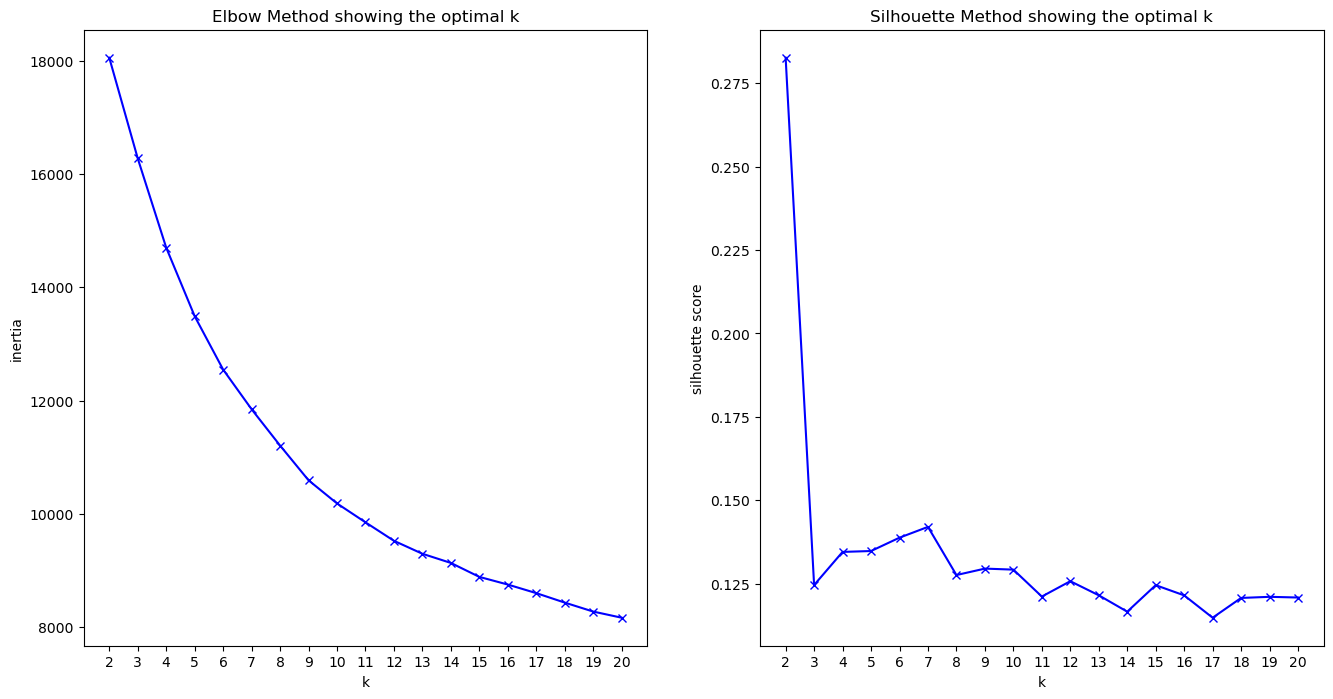

In [34]:
# Buscando el valor de K

K = range(2, 21)

inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    verbose=1)
    kmeans.fit(X_scaled_df)

    filename = "kmeans_" + str(k) + ".pickle" # Path with filename # kmeans_n.pickle
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)

    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

In [35]:
#There is no clear elbow!,or maybe its k=3 because of the silhouette?
#Should we run  the K-Mean with the Dimensionlity Reduction?

#What you do is we run the ISOMAP and the UMAP again with K=6 that is the number of clusters it seems to be optimized in K-Mean

### UMAP = 3

In [86]:
#UMAP

from umap import UMAP

reducer = UMAP(n_components=3,random_state=42)
reducer.fit(X)

X_umap_transformed3 = reducer.transform(X)
X_umap_transformed_df3 = pd.DataFrame(X_umap_transformed3, columns=["UMAP_1","UMAP_2", "UMAP_3"])
X_umap_transformed_df3.head()

C:\Users\joaco\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


,UMAP_1,UMAP_2,UMAP_3
0,-0.297100,5.442490,1.076743
1,12.488435,3.242937,6.759268
2,0.940134,8.825972,1.391137
3,-1.694343,4.456360,2.742859
4,-2.450652,-0.436103,7.149505


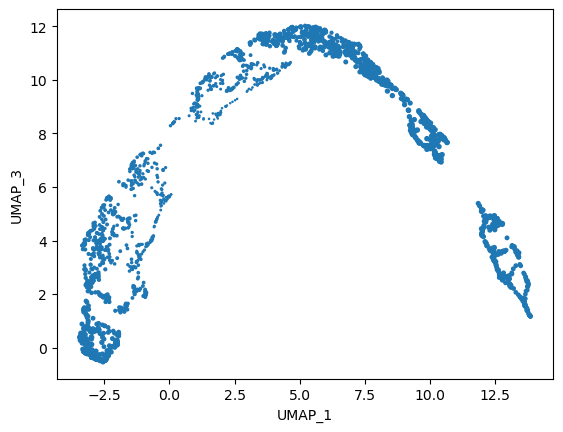

In [87]:
fig, ax = plt.subplots()
ax.scatter(X_umap_transformed_df3['UMAP_1'],X_umap_transformed_df3['UMAP_2'],X_umap_transformed_df3['UMAP_3'])
ax.set_xlabel("UMAP_1")
ax.set_ylabel("UMAP_2")
ax.set_ylabel("UMAP_3")
plt.show()

## HDBSCAN

In [66]:
#Trying HDBSCAN

import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.cluster import HDBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from kneed import KneeLocator
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
import time
import pickle
from dbcv import *

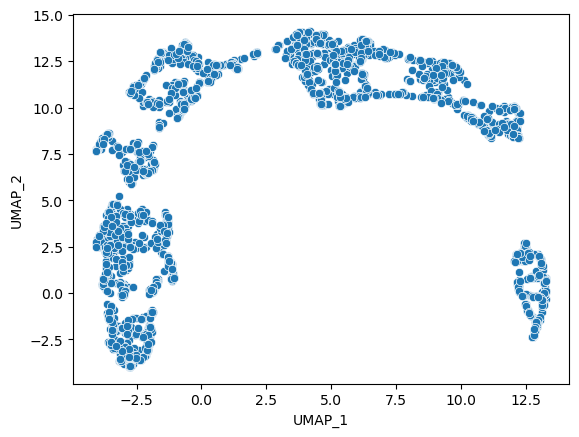

In [90]:
sns.scatterplot(data=X_umap_transformed_df, x="UMAP_1", y="UMAP_2");

In [91]:
# Scaling features
scaler = StandardScaler()
scaler.fit(X_umap_transformed_df)
X_scaled_np = scaler.transform(X_umap_transformed_df)
X_scaled_df = pd.DataFrame(X_scaled_np, columns=X_umap_transformed_df.columns)

# Creating the clustering model
model = HDBSCAN() # Default values are: eps=0.5, min_samples=5
# fit model and predict clusters
yhat = model.fit_predict(X_scaled_df) # .fit(X_scaled_df)

In [92]:
print("The Silhouette score of the model is: ",round(silhouette_score(X_scaled_df, model.fit_predict(X_scaled_df)),2))
print("The Calinksi-Harabasz score of the model is: ",round(calinski_harabasz_score(X_scaled_df, model.fit_predict(X_scaled_df)),2))

The Silhouette score of the model is:  0.25
The Calinksi-Harabasz score of the model is:  58.38


In [93]:
yhat

array([17, 26, 39, ..., 85, 20, -1], dtype=int64)

In [94]:
X_umap_transformed_df['cluster'] = yhat
X_umap_transformed_df.head()

,UMAP_1,UMAP_2,cluster
0,-3.796060,8.062485,17
1,13.236357,0.661808,26
2,-1.817169,10.173134,39
3,-2.661006,3.860967,98
4,-2.188247,-3.334076,84


In [95]:
# retrieve unique clusters
clusters = np.unique(yhat)
clusters # DBSCAN flags with "-1" noisy data.

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126], dtype=int64)

In [96]:
[cluster for cluster in list(clusters) if cluster != -1]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126]

In [97]:
# Number of clusters (excluding noise points)
clusters.size - 1

127

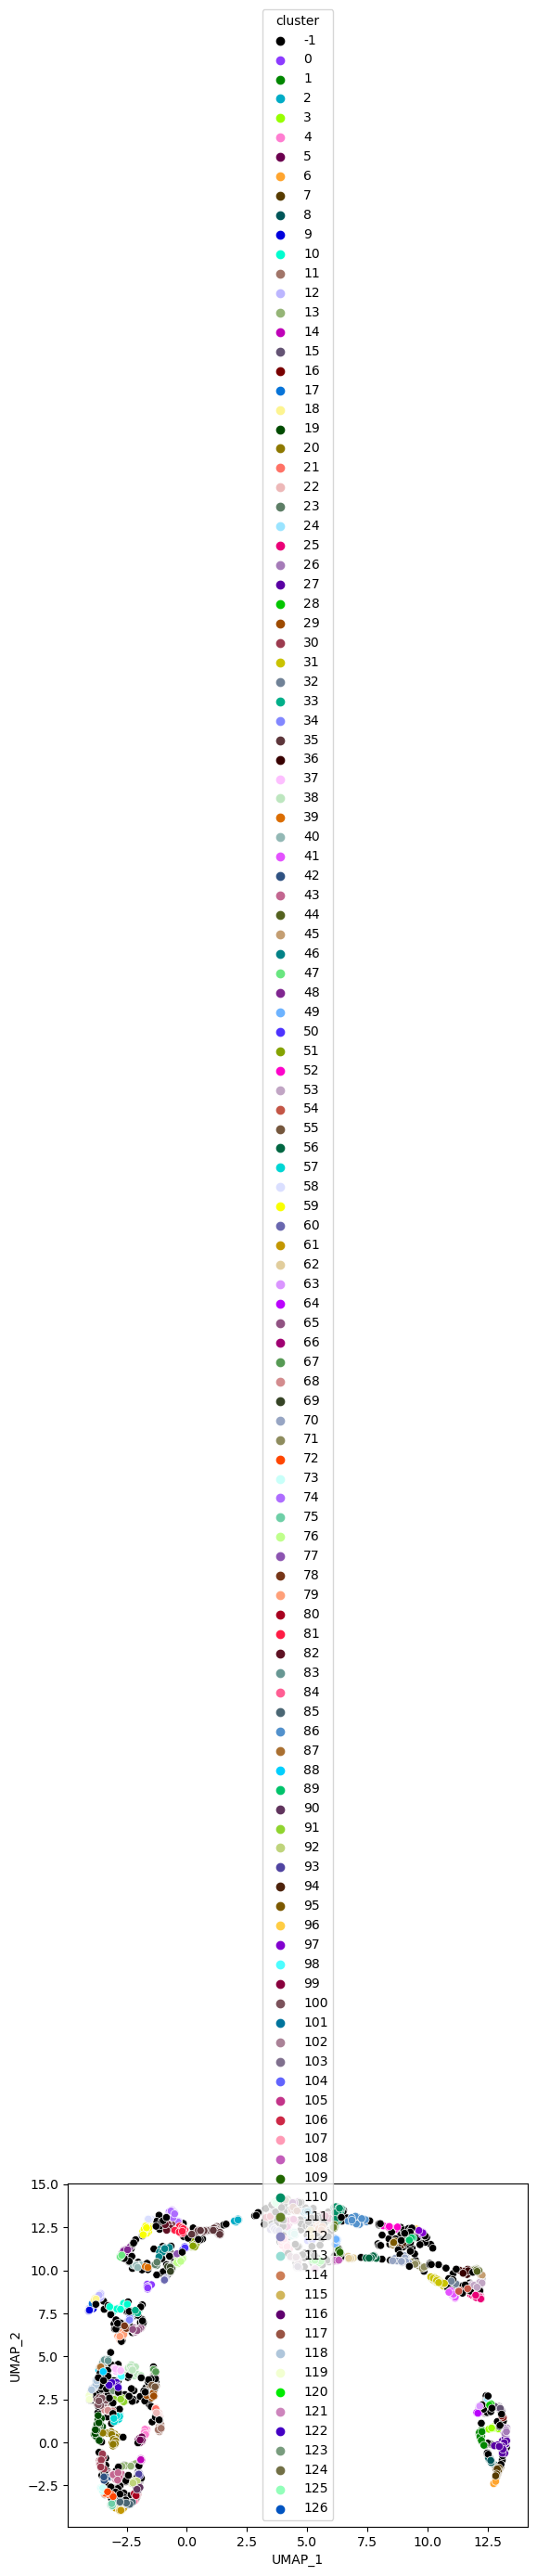

In [98]:
X_umap_transformed_df["cluster"] = yhat
# Creating a pallette of hihg contrast colors with as many color as cluster labels
custom_palette = sns.color_palette(cc.glasbey, n_colors=clusters.size)
# Modifiying the palette to set the color "black=(0.,0.,0.)" to the label "-1"
custom_palette = [color if cluster != -1 else (0.,0.,0.) for cluster, color in zip(clusters,custom_palette)]
sns.scatterplot(X_umap_transformed_df, x="UMAP_1", y="UMAP_2", hue="cluster", palette=custom_palette);
plt.show()